import pandas as pd
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
# Complex Networks - Graphs

The main library used to handle graphs is <a href=https://networkx.github.io/><b>networkx</b></a>

In [ ]:
# !pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Networkx

### The Graph class

The most important class in Networkx is the Graph class. It creates an empty graph for you to load data. 
This creates what is called an `undirected graph` - that is, the graph doesn't really care about source and target nodes. It just connects dots.

In [15]:
G = nx.Graph()

### Graph nodes

By invoking `.nodes` on a graph, you can see all your graph's nodes. Of course there are none yet.

In [16]:
G.nodes

NodeView(())

### Helper function to visualize graph

For now, I'll create a function to visualize graphs - but we'll come back later on how to that exactly

In [17]:
# Visualisation helper function
def view_graph(G):
    """
    View graph is a helper function that takes a graph G and plot its contents.
    """
    
    print(f'Nodes in graph: {G.nodes}')
    print(f'Edges in graph: {G.edges}')
    
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True)
    plt.show()

### Add nodes to graph:

#### The `.add_node()` method

The `.add_node()` function is like a way of updating a dictionary for graphs. It takes a `key`, a name of your node, and this will be the `id` of your node. The example I'll use here is to add_node named `1`, but it could be anything like a string as well. 

In [18]:
G.add_node(1)

In [19]:
G.nodes

NodeView((1,))

Nodes in graph: [1]
Edges in graph: []


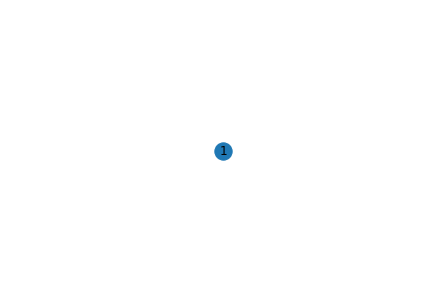

In [20]:
# visualizing it
view_graph(G);

#### The `add_nodes_from()` method

The `add_nodes_from()` receives multiple nodes at a time and add all of them to your graph

In [21]:
G.add_nodes_from([2, 3])

Nodes in graph: [1, 2, 3]
Edges in graph: []


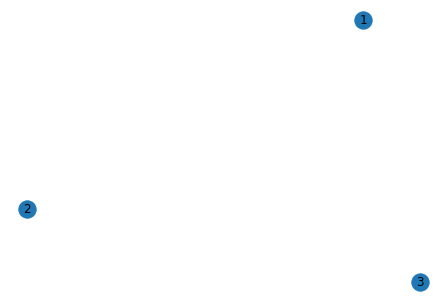

In [42]:
view_graph(G)

### Adding Edges to your graph

#### The `add_edge()` method

The `add_edge()` method is like the `add_node`, except you have to specify two nodes to connect them.

The two nodes are usually called `u` and `v`, where `u` is the source node and `v` the target node. 
However, remember Graph is an instance of an `undirected graph`, which means the graph won't care about sources and targets, it will just put a line between them.

In [43]:
G.add_edge(1, 2)

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2)]


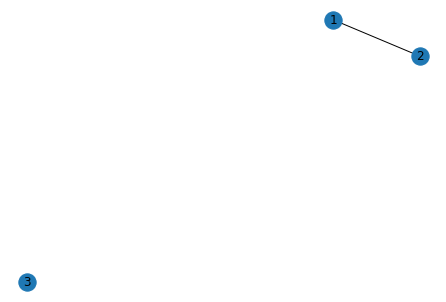

In [45]:
view_graph(G)

#### The `add_edges_from()` method

Just like `add_nodes_from` adds a bunch of nodes to your graph, you can do that too with edges.

In [46]:
G.add_edges_from([(1, 3), (2, 3)])

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


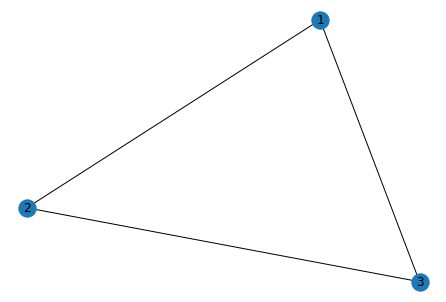

In [47]:
view_graph(G)

# Creating a simple example structure

You can also specify the edges of your graph on the instance creation:

In [48]:
friends_connections = [('Arthur', 'Jenny'), 
                       ('Jenny', 'Chris'), 
                       ('Chris', 'Arthur')]

In [55]:
pd.DataFrame({'cpf_origem':np.random.randint(0,100, size=10),
              'cpf_destino':np.random.randint(0,100, size=10),
              'vlr':np.random.randint(0,100, size=10)})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cpf_origem,cpf_destino,vlr
0,92,78,73
1,93,96,6
2,36,63,52
3,59,73,60
4,4,2,58
5,7,23,59
6,98,50,43
7,73,49,95
8,47,41,24
9,30,93,50


In [49]:
friends = nx.Graph(friends_connections)

In [51]:
friends.nodes

NodeView(('Arthur', 'Jenny', 'Chris'))

In [52]:
friends.edges

EdgeView([('Arthur', 'Jenny'), ('Arthur', 'Chris'), ('Jenny', 'Chris')])

Nodes in graph: ['Arthur', 'Jenny', 'Chris']
Edges in graph: [('Arthur', 'Jenny'), ('Arthur', 'Chris'), ('Jenny', 'Chris')]


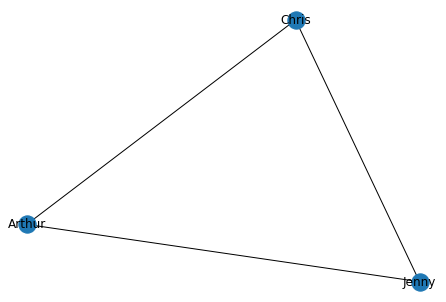

In [50]:
view_graph(friends)

## Graph's `.neighbors()` method.

The method `.neighbors()` returns an iterator - it means you have to transform it into a list to view the resulting neighbours of a node. 

In [57]:
list(friends.neighbors('Arthur'))

['Jenny', 'Chris']

## Degree of a node

An important concept in graphs is the degree of a node. Usually, you are interested in the relevance of that node to your structure, and the most simple relevance metric is the degree of a node, which is just how many neighbours (or <b>connections</b>) it has.

In [58]:
len(list(friends.neighbors('Arthur')))

2

Of course there's already something that does that automatically for you. In this case it is a property of a graph called `.degree`. Just as a curiosity: a property is like an attribute, but under the hood it runs a method.

In [59]:
friends.degree

DegreeView({'Arthur': 2, 'Jenny': 2, 'Chris': 2})

In [60]:
friends.degree['Arthur']

2

## Removing nodes

You can remove nodes using the `.remove_node()` method.

In [61]:
friends.remove_node('Arthur')

In [62]:
friends.degree

DegreeView({'Jenny': 1, 'Chris': 1})

Nodes in graph: ['Jenny', 'Chris']
Edges in graph: [('Jenny', 'Chris')]


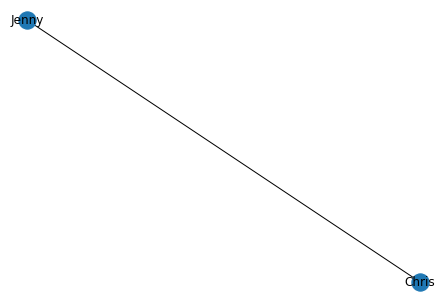

In [64]:
view_graph(friends)

## Removing edges

You can remove connections with the `remove_edge()` method. You have to specify again both `u` and `v` nodes.

Nodes in graph: ['Jenny', 'Chris']
Edges in graph: []


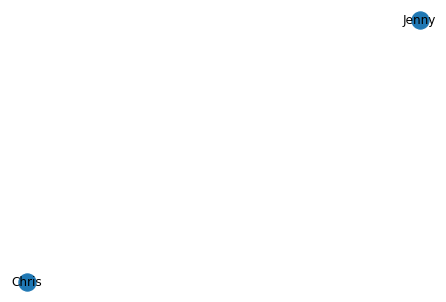

In [65]:
friends.remove_edge('Chris',  'Jenny')
view_graph(friends)

In [66]:
# shift-tab your own graph <3
friends()

TypeError: 'Graph' object is not callable

# Another example

## Another helper function to visualize the next example more closely.

In [68]:
# Visualisation helper function
def view_graph(G):
    """
    View graph is a helper function that takes a graph G and plot its contents.
    
    This is specific for the uk_places graph below. 
    It takes its attribute and plot their labels.
    """
    
    print(f'Nodes in graph: {G.nodes}')
    print(f'Edges in graph: {G.edges}')
    
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G)   
    
    # Extract node attributes and display them as labels
    if len(nx.get_node_attributes(G, 'population')) != 0:
        labels = {key: f'{key} : {str(value)}' for (key, value) in nx.get_node_attributes(G, 'population').items()}
        
        nx.draw(G, pos=pos, with_labels=True, labels=labels)
    else:
        nx.draw(G, pos=pos, with_labels=True)
    # Extract edge attributes and display them as labels    
    if len(nx.get_edge_attributes(G,'distance')) != 0:
        edge_labels = nx.get_edge_attributes(G, 'distance')
        nx.draw_networkx_edge_labels(G, pos=pos, labels = edge_labels)
    plt.figure(figsize=(12,12)) 
    plt.show()

## Directed Graphs - DiGraph

Using `Digraph` class from networkx, you can create directed graphs. This means that the order now matters, the first node in a description of an edge is the `source node` and the last node is the `target node`. It is represented graphically via an arrow pointing from source to target.

In [69]:
roads = [('London', 'Manchester'), 
         ('Manchester', 'Leeds'), 
         ('London', 'Leeds')]

uk_places = nx.DiGraph(roads)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


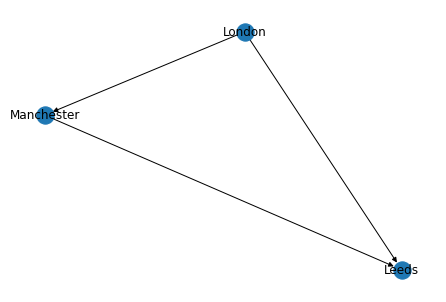

<Figure size 864x864 with 0 Axes>

In [71]:
view_graph(uk_places)

## Directed Graph features: successors and predecessors

In [78]:
# from London, you can go both to Manchester or Leeds
list(uk_places.successors('London'))

['Manchester', 'Leeds']

In [80]:
list(uk_places.successors('Manchester'))

['Leeds']

In [81]:
# you can only go to Manchester from London
list(uk_places.predecessors('Manchester'))

['London']

In [82]:
# there's no way to go to London:
list(uk_places.predecessors('London'))

[]

## Subgraphs

The `.subgraphs()` method creates a subset of your whole graph.

In [83]:
subgraph = uk_places.subgraph(['London', 'Manchester'])

Nodes in graph: ['London', 'Manchester']
Edges in graph: [('London', 'Manchester')]


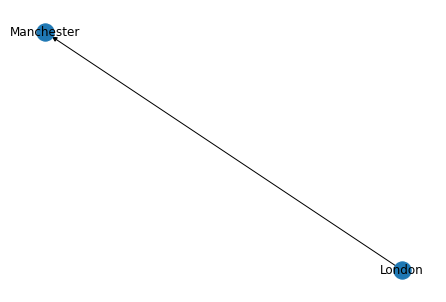

<Figure size 864x864 with 0 Axes>

In [85]:
view_graph(subgraph)

In [86]:
uk_places.degree

DiDegreeView({'London': 2, 'Manchester': 2, 'Leeds': 2})

## Degrees

Along with the measure of degrees (how many nodes a node is connected to), comes the notion of `in_degree` and `out_degree`

In [87]:
list(uk_places.in_degree)

[('London', 0), ('Manchester', 1), ('Leeds', 2)]

In [88]:
list(uk_places.out_degree)

[('London', 2), ('Manchester', 1), ('Leeds', 0)]

In [89]:
uk_places.out_degree

OutDegreeView({'London': 2, 'Manchester': 1, 'Leeds': 0})

In [94]:
uk_places.out_degree(['Manchester'])

OutDegreeView({'Manchester': 1})

In [96]:
uk_places.out_degree()['Manchester']

1

# Adding information to your graph

## Adding features to a node

You can recall that we can obtain a node from our graph using `.nodes` attribute

In [98]:
uk_places.nodes

NodeView(('London', 'Manchester', 'Leeds'))

Inside a node, you can see the `node's attribute`. By now, there are none, of course. For example, for `London`

In [101]:
uk_places.nodes['London']

{}

But it is, thus, like a dictionary that we can add information to:

In [103]:
uk_places.nodes['London']['population'] = 8000000
uk_places.nodes['Manchester']['population'] = 500000
uk_places.nodes['Leeds']['population'] = 470000

In [ ]:
uk_places.nodes['London']['population'] = 8000000
uk_places.nodes['Manchester']['population'] = 500000
uk_places.nodes['Leeds']['population'] = 470000

In [106]:
uk_places.nodes['London']

{'population': 8000000}

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


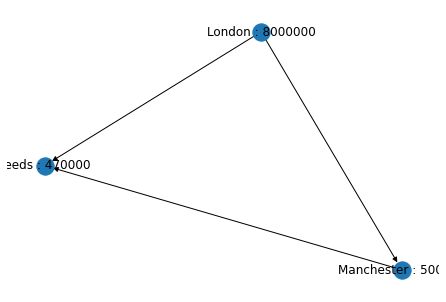

<Figure size 864x864 with 0 Axes>

In [107]:
view_graph(uk_places)

# Adding features to edges

The edges attribute is also like a dictionary, but remember, the `key` of an edge is the pair of `source node` and `target node` (`u`, `v`)

In [110]:
uk_places.nodes['London']

{'population': 8000000}

In [111]:
uk_places.edges

OutEdgeView([('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')])

In [112]:
uk_places.edges[('London', 'Manchester')]

{}

In [113]:
# of course it is empty for now
uk_places.edges['London', 'Leeds']

{}

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


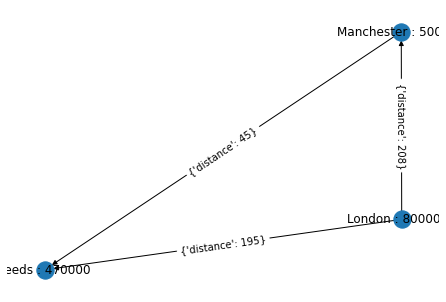

<Figure size 864x864 with 0 Axes>

In [115]:
# but we can add anything again, like a dictionary.
uk_places.edges['London', 'Leeds']['distance'] = 195
uk_places.edges['London', 'Manchester']['distance'] = 208
uk_places.edges['Manchester', 'Leeds']['distance'] = 45

view_graph(uk_places)

## Setting node attributes all together:

The methods `nx.set_node_attributes( your_graph, node_json )` and `nx.set_edge_attributes( your_graph, edge_json )` do it all together:

In [116]:
# see it is a dictionary of dictionaries, containing the key node: {attributtes dictionary}
node_attributes = {'London': {'population': 4000000, 'money':10},
                   'Manchester': {'population': 200000},
                   'Leeds': {'population': 970000}
                  }

nx.set_node_attributes(uk_places, node_attributes)

In [117]:
edge_attributes = {('London', 'Leeds'): {'distance': 295},
                   ('London', 'Manchester'): {'distance': 508},
                   ('Manchester', 'Leeds'): {'distance': 450},
        }

nx.set_edge_attributes(uk_places, edge_attributes)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


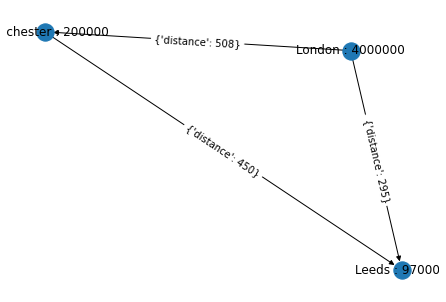

<Figure size 864x864 with 0 Axes>

In [119]:
view_graph(uk_places)